<a href="https://colab.research.google.com/github/xBrymer/PyTorch-Basics/blob/master/PyTorch%20-%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST('', train=True, download= True,
                       transform = transforms.Compose([
                            transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download= True,
                       transform = transforms.Compose([
                            transforms.ToTensor()
                       ]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle = False)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  
  def forward(self, x):

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim =1)
  
net = Net()
print(net)



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

output = net(X)
print(output)

tensor([[-2.3858, -2.3867, -2.2927, -2.2939, -2.3377, -2.3102, -2.2843, -2.2779,
         -2.3083, -2.1662]], grad_fn=<LogSoftmaxBackward>)


In [20]:
import torch.optim as optim
from tqdm.notebook import tqdm

optimizer = optim.Adam(net.parameters(),lr = 0.001)

EPOCHS = 3

for epoch in tqdm(range(EPOCHS)):
  for data in trainset:

    X,y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)


tensor(0.0410, grad_fn=<NllLossBackward>)
tensor(0.0168, grad_fn=<NllLossBackward>)
tensor(0.4208, grad_fn=<NllLossBackward>)



In [21]:
correct = 0
total = 0

with torch.no_grad():
  for data in testset:
    X, y = data
    output = net(X.view(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct +=1
      total +=1

print('Accuracy: ', round(correct/total,3))

Accuracy:  0.969


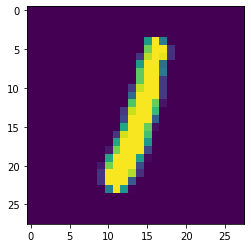

tensor(1)


In [35]:
import matplotlib.pyplot as plt
from random import randint


n = 4
plt.imshow(X[n].view(28,28))
plt.show()
prediction = torch.argmax(net(X[n].view(-1,784))[0])
print(prediction)